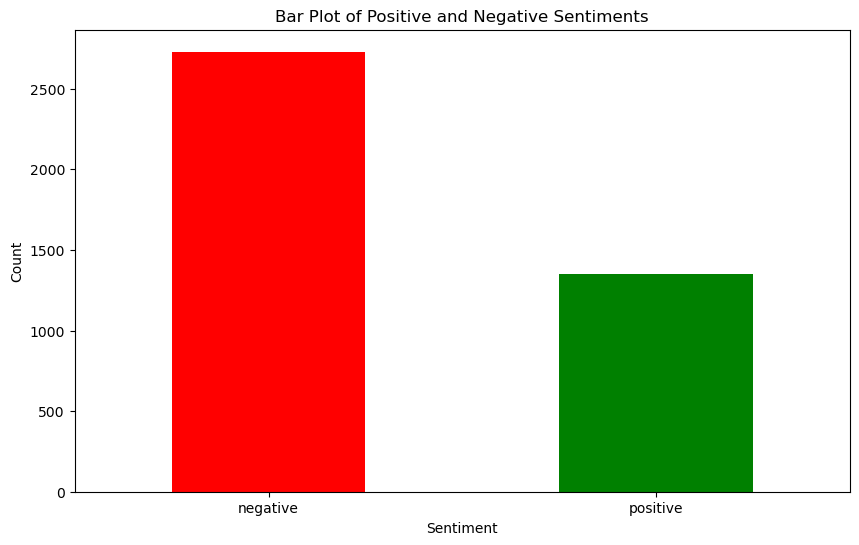

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the dataset
file_path = 'multi-sent.xlsx'
df = pd.read_excel(file_path)

# Filter the dataset to exclude neutral sentiments
filtered_df = df[df['Label_Sentiment'].isin(['positive', 'negative'])]

# Extracting the x and y coordinates for plotting
positive_data = filtered_df[filtered_df['Label_Sentiment'] == 'positive']
negative_data = filtered_df[filtered_df['Label_Sentiment'] == 'negative']

# Generate a bar plot for positive and negative sentiments
sentiment_counts = filtered_df['Label_Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Plot of Positive and Negative Sentiments')
plt.xticks(rotation=0)
plt.savefig("positive_nege.png", dpi=300)
plt.show()


C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_22976\544230269.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Caption_Length'] = filtered_df['Captions'].apply(len)


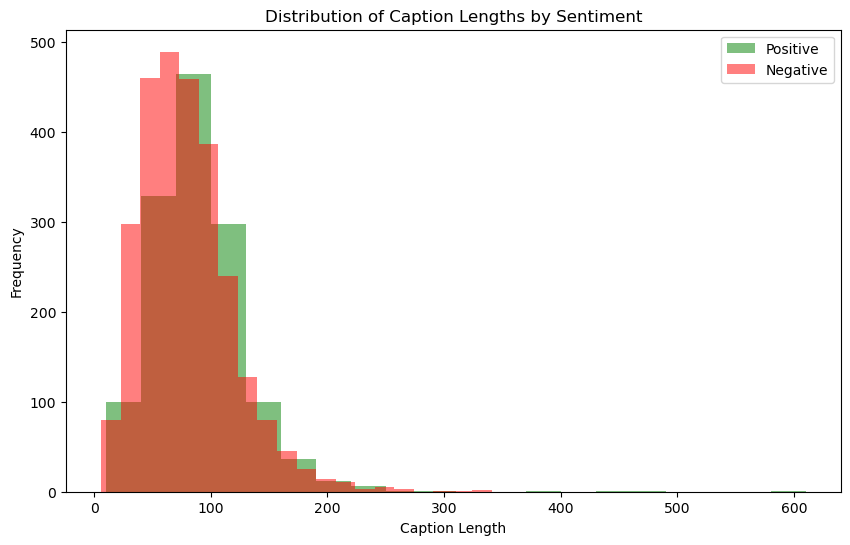

In [9]:

# Filter the dataset to exclude neutral sentiments
filtered_df = df[df['Label_Sentiment'].isin(['positive', 'negative'])]

# Add a column for the length of each caption
filtered_df['Caption_Length'] = filtered_df['Captions'].apply(len)

# 1. Histogram: Distribution of sentiment lengths
plt.figure(figsize=(10, 6))
plt.hist(filtered_df[filtered_df['Label_Sentiment'] == 'positive']['Caption_Length'], bins=20, alpha=0.5, label='Positive', color='green')
plt.hist(filtered_df[filtered_df['Label_Sentiment'] == 'negative']['Caption_Length'], bins=20, alpha=0.5, label='Negative', color='red')
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.title('Distribution of Caption Lengths by Sentiment')
plt.savefig("Distribution of Caption Lengths by Sentiment.png", dpi=300)
plt.legend()
plt.show()



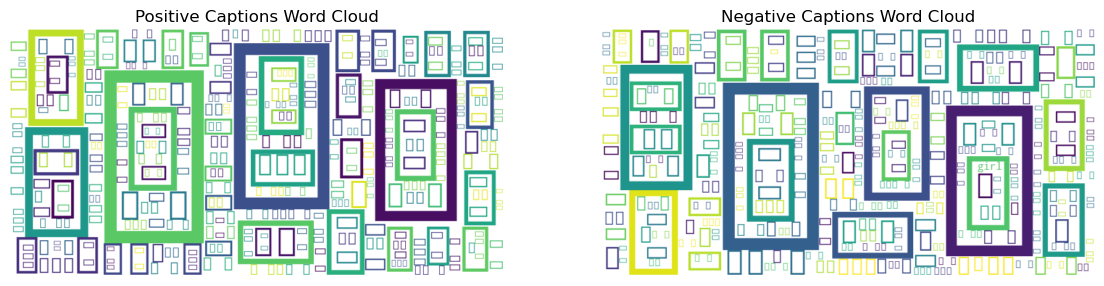

In [14]:
# Filter the dataset to exclude neutral sentiments
filtered_df = df[df['Label_Sentiment'].isin(['positive', 'negative'])]

# Combine all captions for positive and negative sentiments
positive_text = ' '.join(filtered_df[filtered_df['Label_Sentiment'] == 'positive']['Captions'])
negative_text = ' '.join(filtered_df[filtered_df['Label_Sentiment'] == 'negative']['Captions'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(14, 7))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Captions Word Cloud')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Captions Word Cloud')
plt.axis('off')

# Save the figure
plt.savefig("Negative_Captions_Word_Cloud.png", dpi=300)

# Show the figure
plt.show()


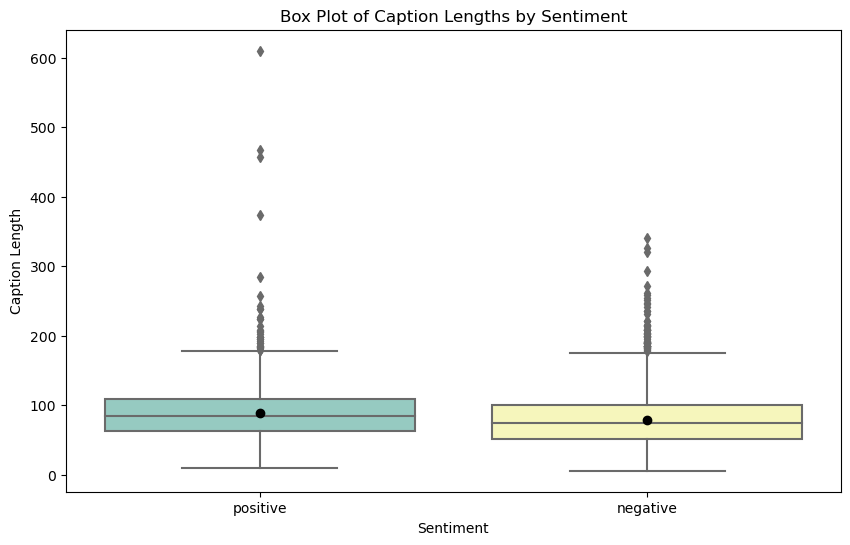

In [11]:
plt.figure(figsize=(10, 6))

# Create the box plot with seaborn for more customization options
sns.boxplot(
    x='Label_Sentiment', 
    y='Caption_Length', 
    data=filtered_df, 
    palette='Set3',  # Color palette for the boxes
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

plt.xlabel('Sentiment')
plt.ylabel('Caption Length')
plt.title('Box Plot of Caption Lengths by Sentiment')
plt.suptitle('')  # Suppress the default title to only show the custom title

# Save the plot as a PNG file
plt.savefig("Box Plot of Caption Lengths by Sentiment.png", dpi=300)
plt.show()
